In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('http://192.168.12.90/exam/mllab_aiml/Day3/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


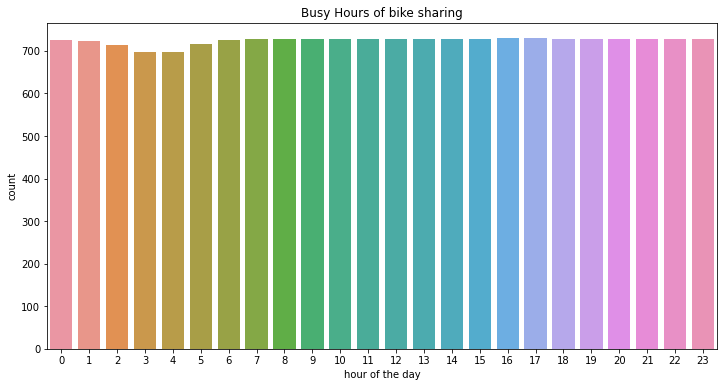

In [4]:
plt.figure(figsize=(12,6))
sns.countplot(x='hr',data=df)
plt.title('Busy Hours of bike sharing')
plt.xlabel('hour of the day')
plt.ylabel('count')
plt.show()

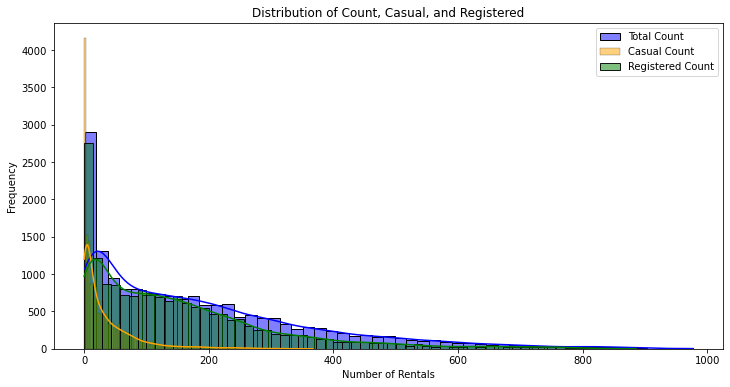

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(df['cnt'], kde=True, label='Total Count', color='blue')
sns.histplot(df['casual'], kde=True, label='Casual Count', color='orange')
sns.histplot(df['registered'], kde=True, label='Registered Count', color='green')
plt.title('Distribution of Count, Casual, and Registered')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

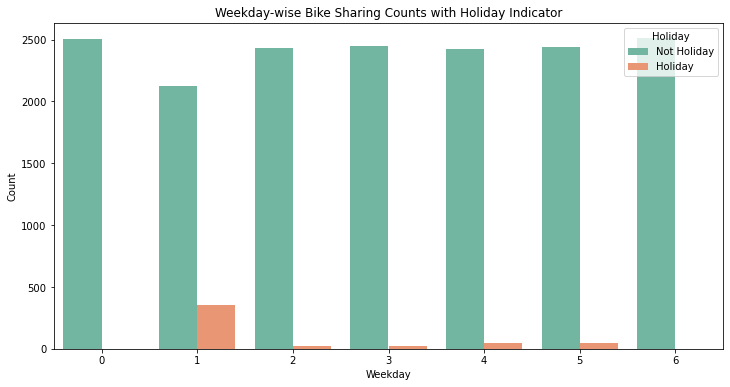

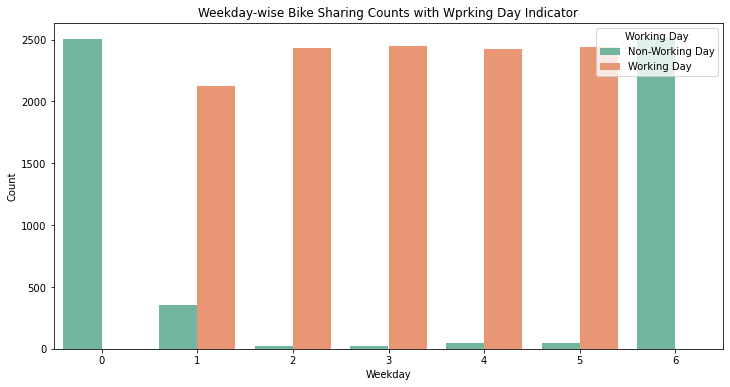

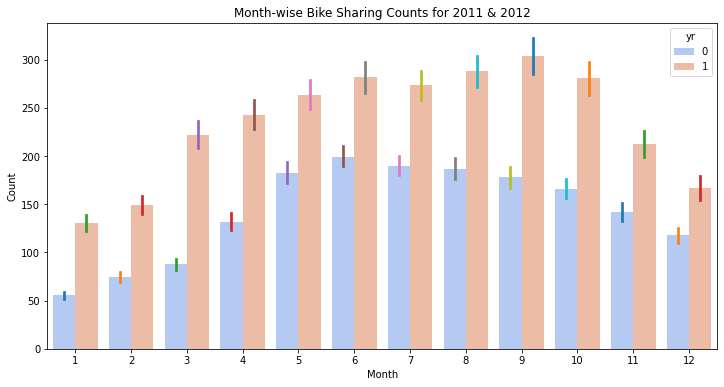

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x='weekday', hue='holiday', data=df, palette='Set2')
plt.title('Weekday-wise Bike Sharing Counts with Holiday Indicator')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Holiday', loc='upper right', labels=['Not Holiday', 'Holiday'])
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='weekday', hue='workingday', data=df, palette='Set2')
plt.title('Weekday-wise Bike Sharing Counts with Wprking Day Indicator')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Working Day', loc='upper right', labels=['Non-Working Day', 'Working Day'])
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='mnth', y='cnt', hue='yr', data=df, palette='coolwarm', errcolor=None)
plt.title('Month-wise Bike Sharing Counts for 2011 & 2012')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

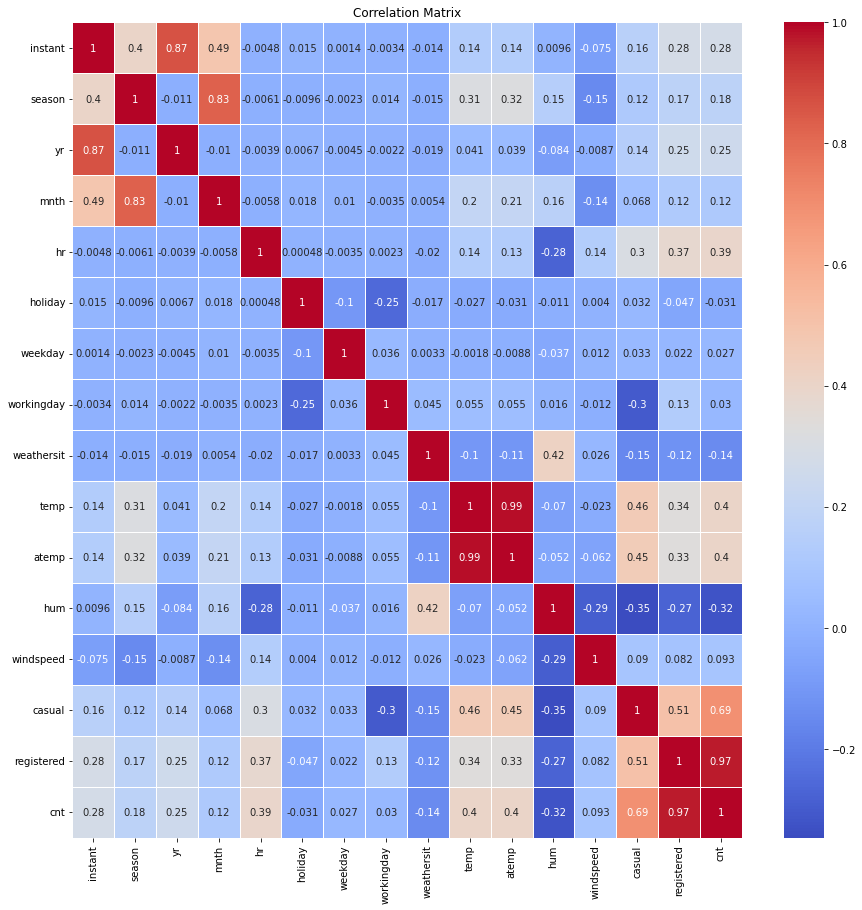

In [7]:
#numeric_columns = df.select_dtypes(include=np.number)
correlation_matrix = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

cont = ['temp', 'atemp', 'hum', 'windspeed']
cat = ['season', 'yr', 'hr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse=False)

x_scaled = scaler.fit_transform(df[cont])
x_encoded = encoder.fit_transform(df[cat])

x_combined = pd.concat([pd.DataFrame(x_scaled), pd.DataFrame(x_encoded)],axis=1)

y_train=df['cnt']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_combined, y_train, test_size = 0.2, random_state = 42)

In [10]:
import numpy as np
from scipy.linalg import lstsq

x_linear = df[['temp', 'atemp', 'hum', 'windspeed']].values
y_linear = df['cnt'].values

x_linear = np.column_stack((np.ones(len(x_linear)),x_linear))

theta, residuals, rank, s = lstsq(x_linear, y_linear)

print("Co-efficient (Theta): ", theta)

Co-efficient (Theta):  [ 161.80690219   85.57649678  314.34292899 -275.18031254   42.97925525]


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

Mean Squared Error:  10081.695321490219
R2 Score:  0.6816180527589403
